# Notes

# Load Modules

In [1]:
import numpy as np
import pandas as pd

import anndata as adata
import scanpy as sc
import squidpy as sq
from SpaceFlow import SpaceFlow

# Load Data

In [2]:
exp_df = pd.read_csv("./simulated_expression.csv", index_col=0)
exp_df.head()

,cell1,cell2,cell3,cell4,cell5,cell6,cell7,cell8,cell9,cell10,...,cell445,cell446,cell447,cell448,cell449,cell450,cell451,cell452,cell453,cell454
A1_TF1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2_TF1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2_TF2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2_TF3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2_TF4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
meta_info_df = pd.read_csv("./simulation_disconnected_ontrac_input.csv", index_col=0)
meta_info_df.head()

,x,y,Niche_NTScore,Cell_NTScore,Ground_Truth,Cell_Type,Lineage
Cell_ID,,,,,,,
cell1,-0.400000,0.933977,0.325438,0.410390,0.400000,A,1
cell2,0.400000,-0.970186,0.365129,0.441723,0.400000,A,1
cell3,-0.405310,-0.829752,0.547304,0.490767,0.405310,A,1
cell4,0.000000,-0.023475,0.000446,0.068882,0.000000,D,2
cell5,0.405357,-0.981907,0.345863,0.448035,0.405357,A,1


In [4]:
ad = adata.AnnData(exp_df.T)

In [5]:
ad.X

array([[    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ..., 24237, 24052, 35726],
       ...,
       [    0,     0,     0, ..., 16683, 32342, 53638],
       [    0,     0,     0, ..., 10039, 17304, 21119],
       [    0,     0,     0, ...,  6950, 17967, 19057]])

In [6]:
ad.obs_names

Index(['cell1', 'cell2', 'cell3', 'cell4', 'cell5', 'cell6', 'cell7', 'cell8',
       'cell9', 'cell10',
       ...
       'cell445', 'cell446', 'cell447', 'cell448', 'cell449', 'cell450',
       'cell451', 'cell452', 'cell453', 'cell454'],
      dtype='object', length=454)

In [7]:
ad.var_names

Index(['A1_TF1', 'A2_TF1', 'A2_TF2', 'A2_TF3', 'A2_TF4', 'A3_TF1', 'A3_TF2',
       'A4_TF1', 'A5_TF1', 'A6_TF1', 'A6_TF2', 'A7_TF1', 'A7_TF2',
       'left_A1_TF1', 'left_A1_TF2', 'left_A1_TF3', 'left_A1_TF4',
       'left_B1_TF1', 'left_B1_TF2', 'left_B1_TF3', 'left_B2_TF1',
       'left_C1_TF1', 'left_C2_TF1', 'left_C2_TF2', 'left_C2_TF3',
       'left_C3_TF1', 'left_C3_TF2', 'left_C4_TF1', 'left_C4_TF2',
       'left_D1_TF1', 'left_D1_TF2', 'left_D1_TF3', 'left_D2_TF1',
       'left_D3_TF1', 'left_D4_TF1', 'left_D4_TF2', 'left_D4_TF3',
       'left_D4_TF4', 'left_D4_TF5', 'left_E1_TF1', 'left_E1_TF2',
       'left_E1_TF3', 'left_E1_TF4', 'left_E1_TF5', 'left_E1_TF6',
       'left_E1_TF7', 'left_F1_TF1', 'left_F1_TF2', 'left_F1_TF3',
       'left_F1_TF4', 'left_F1_TF5', 'left_F1_TF6', 'left_F1_TF7',
       'left_F1_TF8', 'left_F1_TF9', 'left_F1_TF10', 'left_F2_TF1',
       'left_F2_TF2', 'right_M1_TF1', 'right_M1_TF2', 'right_M1_TF3',
       'right_M2_TF1', 'right_M3_TF1', 'right_M3

In [8]:
ad.obs = ad.obs.join(meta_info_df)
ad.obs.head()

,x,y,Niche_NTScore,Cell_NTScore,Ground_Truth,Cell_Type,Lineage
cell1,-0.400000,0.933977,0.325438,0.410390,0.400000,A,1
cell2,0.400000,-0.970186,0.365129,0.441723,0.400000,A,1
cell3,-0.405310,-0.829752,0.547304,0.490767,0.405310,A,1
cell4,0.000000,-0.023475,0.000446,0.068882,0.000000,D,2
cell5,0.405357,-0.981907,0.345863,0.448035,0.405357,A,1


In [9]:
ad.obsm['spatial'] = ad.obs[['x', 'y']].values

# SpaceFlow

In [10]:
sf = SpaceFlow.SpaceFlow(adata=ad)

In [11]:
sf.preprocessing_data(n_top_genes=3000)

/sc/arion/work/wangw32/conda-env/envs/spaceflow/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:412: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)


In [12]:
sf.train(spatial_regularization_strength=0.1, z_dim=50, lr=1e-3, epochs=1000, max_patience=50, min_stop=100, random_seed=42, gpu=0, regularization_acceleration=True, edge_subset_sz=1000000)

Epoch 2/1000, Loss: 1.3369324207305908
Epoch 12/1000, Loss: 0.54261714220047
Epoch 22/1000, Loss: 0.4450288414955139
Epoch 32/1000, Loss: 0.49127960205078125
Epoch 42/1000, Loss: 0.36630064249038696
Epoch 52/1000, Loss: 0.3908672630786896
Epoch 62/1000, Loss: 0.3023373782634735
Epoch 72/1000, Loss: 0.28467869758605957
Epoch 82/1000, Loss: 0.4443659782409668
Epoch 92/1000, Loss: 0.2570444643497467
Epoch 102/1000, Loss: 0.28431031107902527
Epoch 112/1000, Loss: 0.3656499683856964
Epoch 122/1000, Loss: 0.27943283319473267
Epoch 132/1000, Loss: 0.2740798890590668
Epoch 142/1000, Loss: 0.22006568312644958
Epoch 152/1000, Loss: 0.27803730964660645
Epoch 162/1000, Loss: 0.26659297943115234
Epoch 172/1000, Loss: 0.2794443368911743
Epoch 182/1000, Loss: 0.21455731987953186
Epoch 192/1000, Loss: 0.21174442768096924
Training complete!
Embedding is saved at ./embedding.tsv


array([[ 0.9132539 ,  0.33997113, -0.557186  , ...,  0.71219903,
        -0.379583  ,  2.656052  ],
       [ 0.9091226 , -0.28985685, -0.3451687 , ...,  1.815215  ,
        -0.29234487,  3.06506   ],
       [-0.0305405 , -0.34902844, -0.42890546, ...,  1.8680053 ,
        -0.41675106,  2.5989106 ],
       ...,
       [-0.01779817,  0.36902303, -0.21315616, ...,  1.0938028 ,
        -0.29153696,  2.4918332 ],
       [ 0.93923366,  0.64475626, -0.47861633, ...,  1.1122226 ,
        -0.37373063,  3.1757944 ],
       [ 0.37917057,  1.1721675 , -0.39169067, ...,  1.0352012 ,
        -0.39769626,  3.0863378 ]], dtype=float32)

In [13]:
sf.segmentation(domain_label_save_filepath="./domains.tsv", n_neighbors=50, resolution=1.0)

Performing domain segmentation


/sc/arion/work/wangw32/conda-env/envs/spaceflow/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Segmentation complete, domain labels of cells or spots saved at ./domains.tsv !


/sc/arion/work/wangw32/conda-env/envs/spaceflow/lib/python3.9/site-packages/SpaceFlow/SpaceFlow.py:306: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(embedding_adata, resolution=float(resolution))


No segmentation data found, please ensure you have run the segmentation() method.


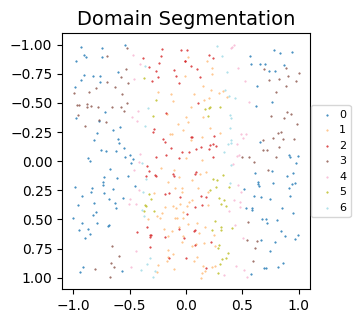

In [14]:
sf.plot_segmentation(segmentation_figure_save_filepath="./domain_segmentation.pdf", colormap="tab20", scatter_sz=1., rsz=4., csz=4., wspace=.4, hspace=.5, left=0.125, right=0.9, bottom=0.1, top=0.9)

In [15]:
sf.pseudo_Spatiotemporal_Map(pSM_values_save_filepath="./pSM_values.tsv", n_neighbors=20, resolution=1.0)

Performing pseudo-Spatiotemporal Map
pseudo-Spatiotemporal Map(pSM) calculation complete, pSM values of cells or spots saved at ./pSM_values.tsv!


In [16]:
sf.plot_pSM(pSM_figure_save_filepath="./pseudo-Spatiotemporal-Map.pdf", colormap="roma", scatter_sz=1., rsz=4., csz=4., wspace=.4, hspace=.5, left=0.125, right=0.9, bottom=0.1, top=0.9)

Plotting complete, pseudo-Spatiotemporal Map figure saved at ./pseudo-Spatiotemporal-Map.pdf !
